In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import sqlite3
import sys
import os.path as osp
sys.path.append(osp.abspath('musically_tiktok_api_python'))
from crawl_videos_by_tag import get_ahegao_hashtags, get_hitormiss_hashtags

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:70% !important; }</style>"))

In [3]:
import pandas as pd
# Create your connection.
conn = sqlite3.connect('hashtags.db')

videos = pd.read_sql_query("SELECT * FROM videos", conn)
videos['create_time'] = pd.to_datetime(videos['create_time'], unit='s')

In [4]:
videos.describe()

,downloaded
count,8832.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [5]:
videos.head()

,tag_id,share_url,downloaded,share_id,download_url,download_id,create_time
0,2128154,https://www.musical.ly/v/6647420336612576517.html,0,6647420336612576517,https://api2.musical.ly/aweme/v1/play/?video_i...,v09044470000bh060nnho6fgm2m56rg0,2019-01-17 11:05:56
1,2128154,https://www.musical.ly/v/6640466162972888326.html,0,6640466162972888326,https://api2.musical.ly/aweme/v1/play/?video_i...,v09044690000bgjqnjjdjls1kmdlbrg0,2018-12-29 17:20:11
2,2128154,https://www.musical.ly/v/6645991748881370374.html,0,6645991748881370374,https://api2.musical.ly/aweme/v1/play/?video_i...,v09044e50000bgtkseivu19bh8vddup0,2019-01-13 14:42:17
3,2128154,https://www.musical.ly/v/6618635565635996933.html,0,6618635565635996933,https://api2.musical.ly/aweme/v1/play/?video_i...,v09044220000bfd1rps108gom3cabhfg,2018-10-31 21:26:19
4,2128154,https://www.musical.ly/v/6626762972934966533.html,0,6626762972934966533,https://api2.musical.ly/aweme/v1/play/?video_i...,v09044350000bfrfriajqrogji3tsmt0,2018-11-22 19:04:48


In [6]:
videos.columns

Index(['tag_id', 'share_url', 'downloaded', 'share_id', 'download_url',
       'download_id', 'create_time'],
      dtype='object')

In [7]:
videos_ahegao = videos[videos['tag_id'].isin(get_ahegao_hashtags().keys())]
videos_hitormiss = videos[videos['tag_id'].isin(get_hitormiss_hashtags().keys())]


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


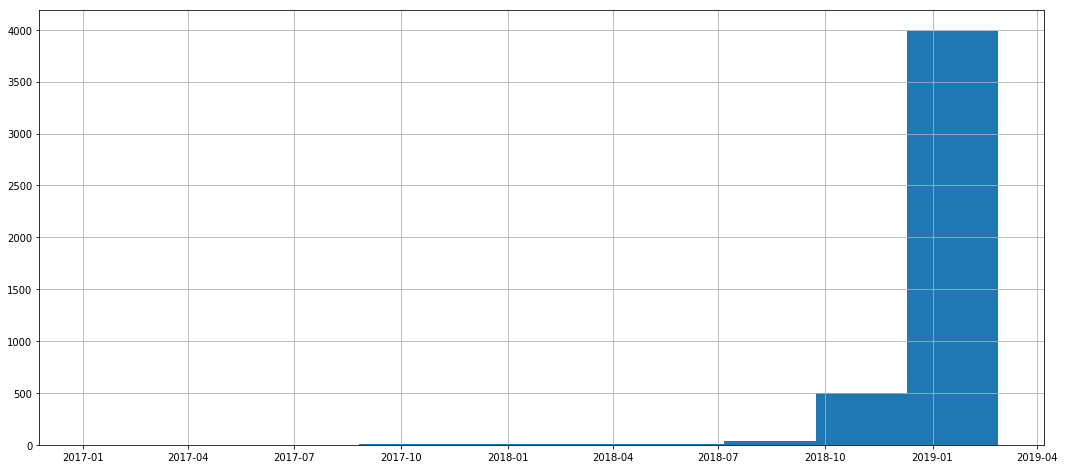

In [8]:
plt.figure(figsize=(18, 8))
videos_ahegao['create_time'].hist()

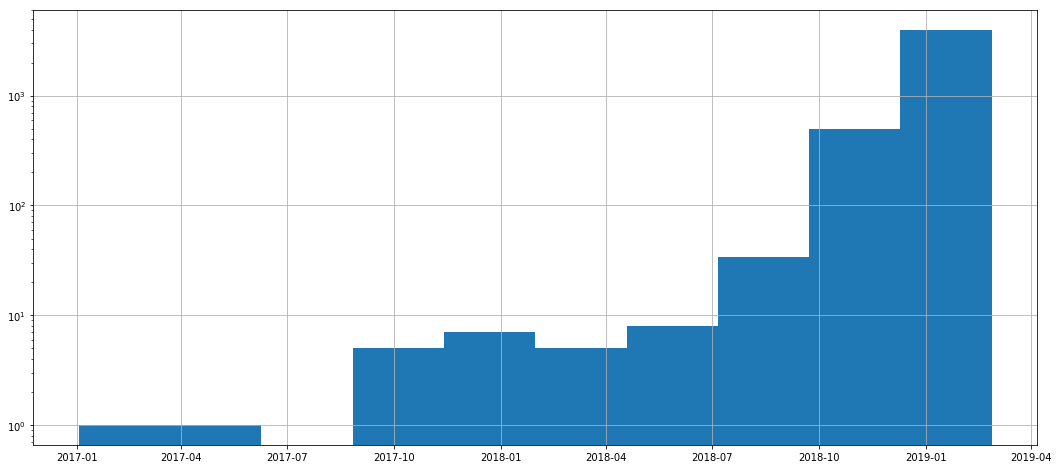

In [9]:
plt.figure(figsize=(18, 8))
videos_ahegao['create_time'].hist(log=True)

In [10]:
videos_ahegao = videos_ahegao.set_index('create_time')
videos_hitormiss = videos_hitormiss.set_index('create_time')

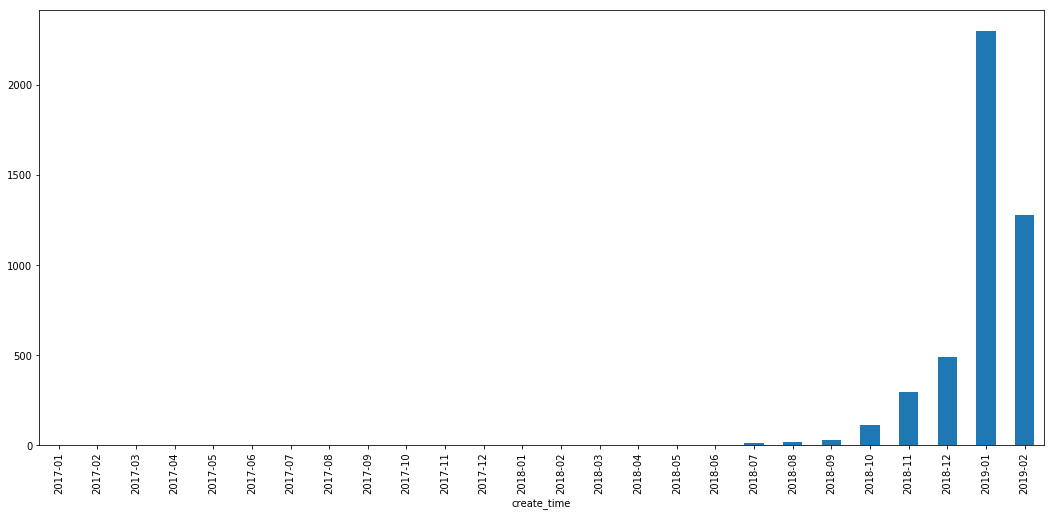

In [11]:
plt.figure(figsize=(18, 8))
created_hist = videos_ahegao.resample('M')['share_id'].count()
created_hist.plot(kind='bar')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: created_hist.index[y].strftime('%Y-%m')))
plt.savefig('time-histogram.png')
plt.show()

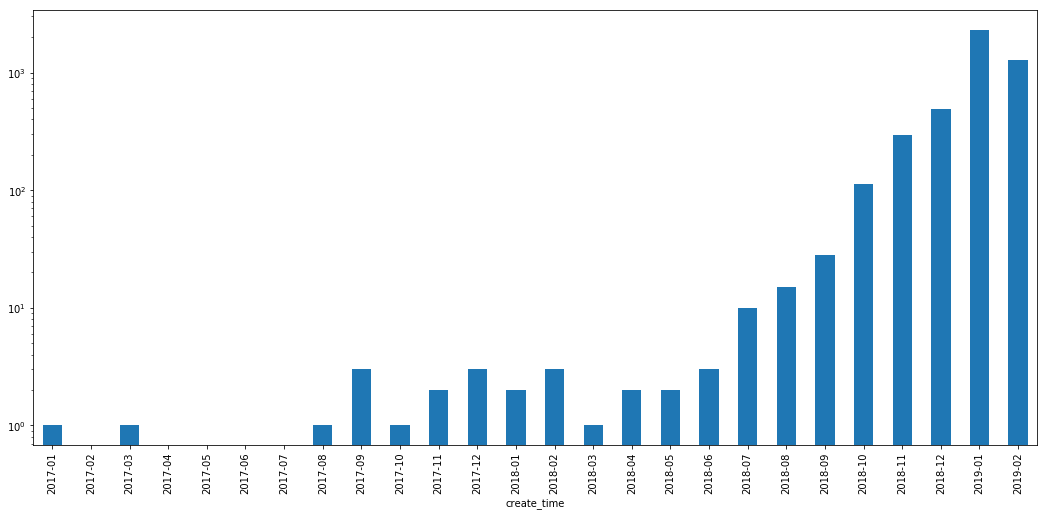

In [12]:
plt.figure(figsize=(18, 8))
created_hist.plot(kind='bar', log=True)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: created_hist.index[y].strftime('%Y-%m')))

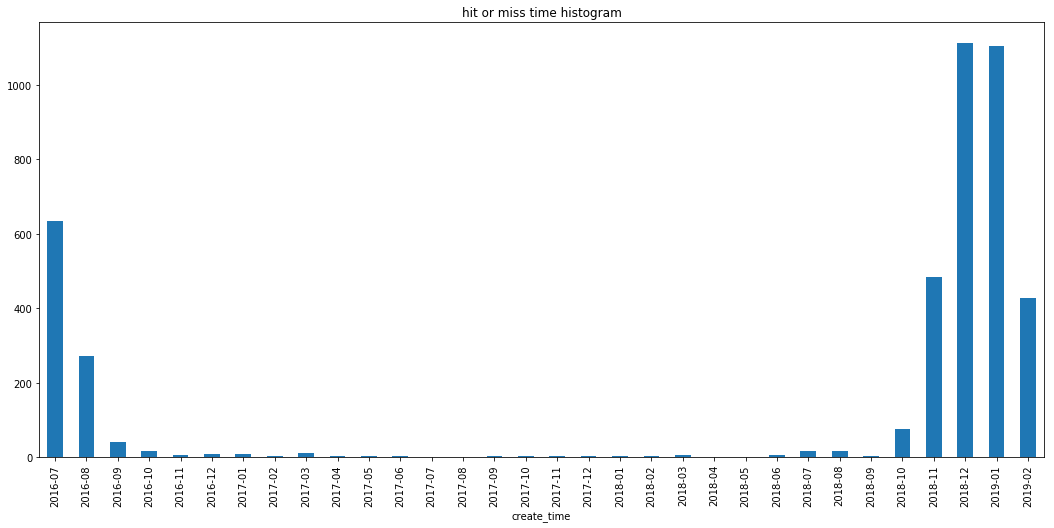

In [20]:
plt.figure(figsize=(18, 8))
created_hist = videos_hitormiss.resample('M')['share_id'].count()
created_hist.plot(kind='bar')
plt.title('hit or miss time histogram')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda y, _: created_hist.index[y].strftime('%Y-%m')))
plt.savefig('time-hitormiss-histogram.png')
plt.show()

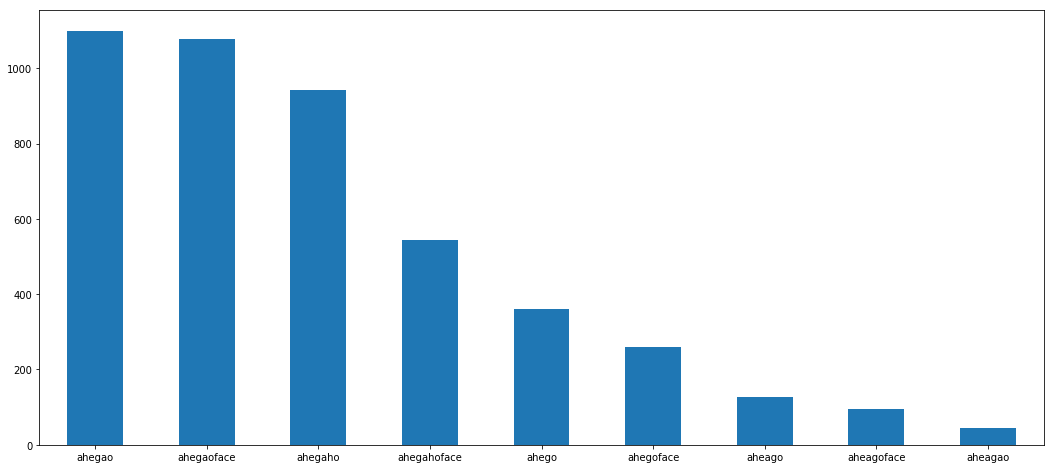

In [14]:
plt.figure(figsize=(18, 8))
tag_labels = get_ahegao_hashtags()
videos_ahegao['tag_id'].value_counts().plot(kind='bar')
plt.gca().set_xticklabels(tag_labels.values(), rotation=0)
plt.savefig('hashtag-histogram.png')
plt.show()

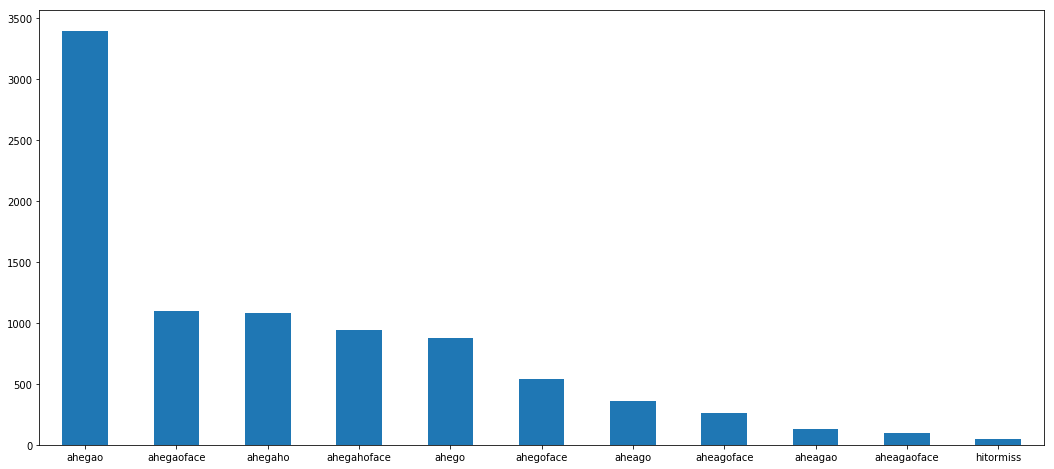

In [15]:
plt.figure(figsize=(18, 8))
tag_labels = {**get_ahegao_hashtags(), **get_hitormiss_hashtags()}
videos['tag_id'].value_counts().plot(kind='bar')
plt.gca().set_xticklabels(tag_labels.values(), rotation=0)
plt.savefig('hashtag-histogram.png')
plt.show()

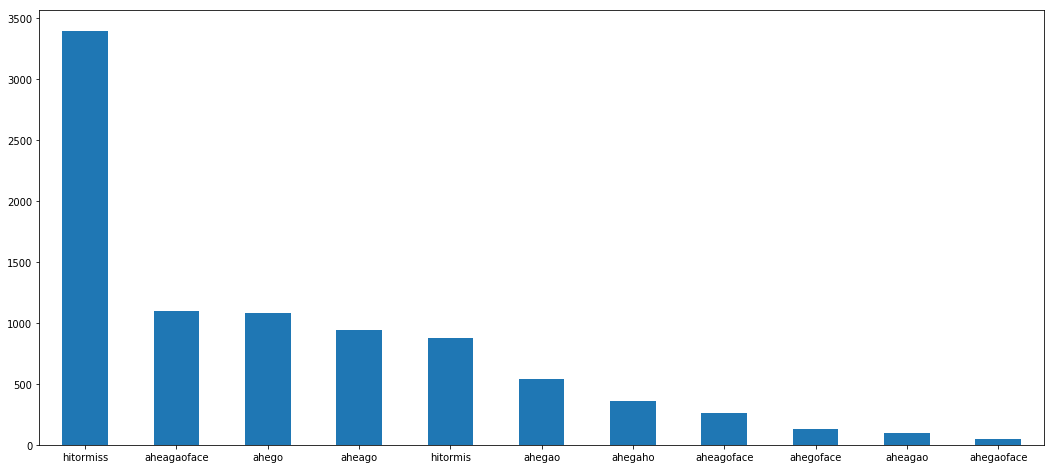

In [16]:
plt.figure(figsize=(18, 8))
videos_hist = videos['tag_id'].value_counts()
videos_hist.index = videos_hist.index.map(tag_labels)
videos_hist.plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('hashtags-all-histogram.png')
plt.show()

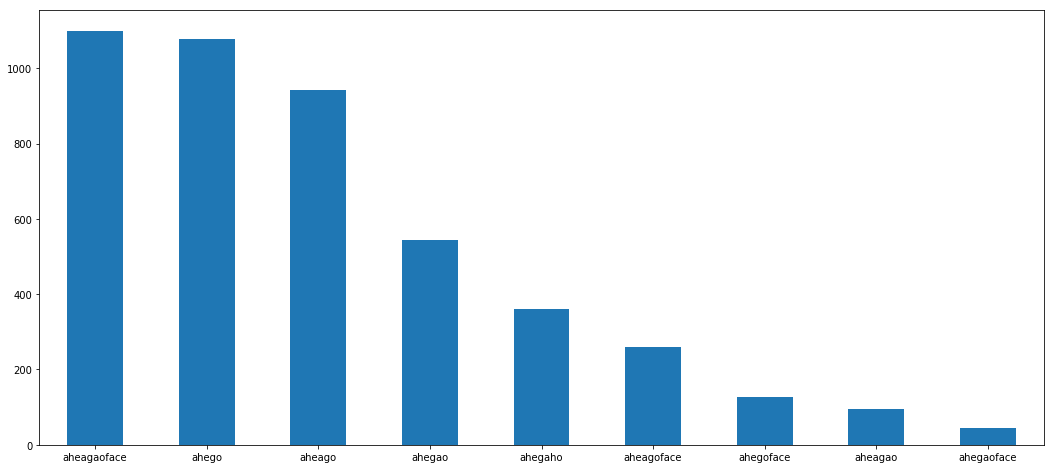

In [17]:
plt.figure(figsize=(18, 8))
videos_hist = videos_ahegao['tag_id'].value_counts()
videos_hist.index = videos_hist.index.map(tag_labels)
videos_hist.plot(kind='bar')
plt.xticks(rotation=0)
plt.savefig('hashtag-histogram.png')
plt.show()

In [18]:
videos_hist.index, videos['tag_id'].value_counts().index

(Index(['aheagaoface', 'ahego', 'aheago', 'ahegao', 'ahegaho', 'aheagoface',
        'ahegoface', 'aheagao', 'ahegaoface'],
       dtype='object'),
 Index(['1887884', '1615419720169494', '29504659', '73193535', '21369576',
        '2128154', '1614591578030086', '1607073744304130', '1608178707908613',
        '1618165477879878', '30055085'],
       dtype='object'))

In [19]:
videos_hist

aheagaoface    1100
ahego          1079
aheago          943
ahegao          543
ahegaho         360
aheagoface      260
ahegoface       128
aheagao          94
ahegaoface       45
Name: tag_id, dtype: int64

In [21]:
543/(1079+943+360+94)

0.2193053311793215